# K-means for tfidf

In [1]:
import numpy as np

In [9]:
from sklearn.cluster import KMeans

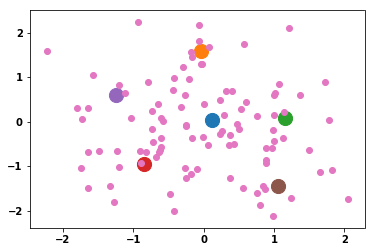

In [27]:
X, Y = np.random.randn(100), np.random.randn(100)
import matplotlib.pyplot as plt
cluster = KMeans(n_clusters=6)
cluster.fit(list(zip(X,Y)))
for x,y in cluster.cluster_centers_:
    plt.scatter(x,y,s=200)
plt.scatter(X,Y)

In [42]:
list(zip(X,Y,cluster.labels_))[:5]

[(-0.41752507623680274, -2.009745404975345, 3),
 (0.9752080868206882, -0.5945001918772512, 2),
 (-0.8982345638277424, -0.6561181520832577, 3),
 (-1.1094273390955802, 0.6460126000864598, 4),
 (0.5592947368582044, -1.4897852340758209, 5)]

In [43]:
import pandas as pd

In [48]:
a=pd.read_csv(r'sqlResult_1558435.csv',encoding='GB18030')

In [54]:
a.head(2)

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm


In [63]:
result=a.dropna(subset=['source','content']).copy()

In [237]:
result['source'].shape

(87052,)

In [225]:
np.sum(result['source'].iloc[80000:90000]=='新华社')

7052

In [68]:
import re
import jieba

In [165]:
content = result['content'].copy()
pattern=re.compile('\w+')

In [166]:
def clear_content(string):
    string = ''.join(pattern.findall(string))
    string = jieba.cut(string)
    return ' '.join(string)

In [157]:
source= result['source'].copy()
removed_duplicate= set(b)
source_map= {value : index for index, value in enumerate(set(b))}
source.replace(source_map,inplace=True)

In [65]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [186]:
from collections import Counter

In [194]:
V = TfidfVectorizer(max_features=60)

In [195]:
M = V.fit_transform(content.apply(clear_content))

In [196]:
tfidf = M.toarray()

In [255]:
left,right = 0,60000
num_of_unique =len(set(source[left:right])) 
KM = KMeans(n_clusters=2)
KM.fit(tfidf[left:right])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [256]:
most_common_num =10
C = Counter(KM.labels_)
C1 = Counter(source[left:right])
print('Kmeans:{}\nOriginal:{}'.format(C.most_common(most_common_num),C1.most_common(most_common_num)))

Kmeans:[(1, 45969), (0, 14031)]
Original:[(823, 51609), (113, 523), (252, 510), (515, 385), (171, 308), (525, 270), (412, 232), (311, 194), (714, 172), (787, 132)]
